In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
y=data["v1"]
x=data["v2"]

## Count Vectorizer

In [5]:
cvex=CountVectorizer()
cx=cvex.fit_transform(x)

In [6]:
cx.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
cx.shape

(5572, 8672)

## Use SMOTE for balance the response data

In [8]:
smt=SMOTE()
x_sm,y_sm=smt.fit_resample(cx,y)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2,random_state=0)

## Machine learning

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
bmodel=RandomForestClassifier(n_estimators=500)
bmodel.fit(x_train,y_train)
y_pred=bmodel.predict(x_test)
accuracy_score(y_test,y_pred)

0.9590673575129534

In [39]:
#hyper parameter optimization

param_grid = {'n_estimators': [50,100,500,700]}
kfold = KFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(bmodel, param_grid, scoring='accuracy', cv=kfold)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


{'n_estimators': 100}
0.9606217616580311


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [ ]:
def fit_ml0(idx):
  models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=10),RandomForestClassifier(n_estimators=500),LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis()]
  model1=models[idx]
  model1.fit(x_train.toarray(),y_train)
  y_pred=model1.predict(x_test.toarray())
  return accuracy_score(y_test,y_pred)

In [ ]:
for j in range(5):
  print(fit_ml0(j))

0.9626943005181348
0.5818652849740933
0.9590673575129534
0.8367875647668394


/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.9367875647668393


In [67]:
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
#logistic Regression
lmodel=LogisticRegression()
lmodel.fit(x_train,y_train)
y_pred=lmodel.predict(x_test)
accuracy_score(y_test,y_pred)

0.9626943005181348

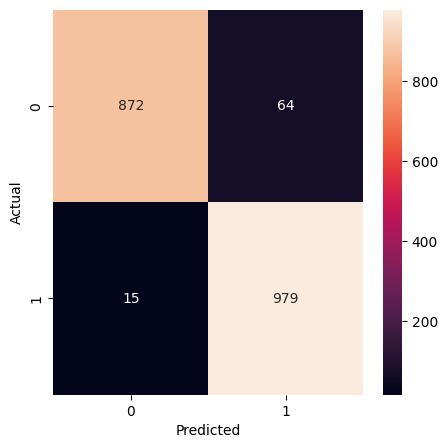

              precision    recall  f1-score   support

         ham       0.98      0.93      0.96       936
        spam       0.94      0.98      0.96       994

    accuracy                           0.96      1930
   macro avg       0.96      0.96      0.96      1930
weighted avg       0.96      0.96      0.96      1930



In [69]:
y_pred=bmodel.predict(x_test)


plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_test,y_pred))


In [70]:
#Random Forest
rmodel=RandomForestClassifier(n_estimators=500)
rmodel.fit(x_train,y_train)
y_pred=rmodel.predict(x_test)
accuracy_score(y_test,y_pred)

0.9590673575129534

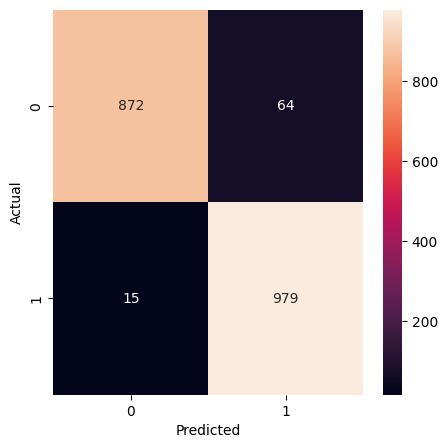

              precision    recall  f1-score   support

         ham       0.98      0.93      0.96       936
        spam       0.94      0.98      0.96       994

    accuracy                           0.96      1930
   macro avg       0.96      0.96      0.96      1930
weighted avg       0.96      0.96      0.96      1930



In [71]:
y_pred=rmodel.predict(x_test)
confusion_matrix=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_test,y_pred))


## Validation

In [64]:
emails=["Hey, you have won a car!!! congrats","Dear applicant,Your CV has been recieved. Best regurds."]
yp=rmodel.predict(cvex.transform(emails))
yp

array(['spam', 'ham'], dtype=object)